# Sentiments towards COVID-19 Vaccine in South Africa

## Background
What were we trying to achieve? What are the key results/insights did we obtain? How did we get to these insights? What data was used and how was it processed? 

In [3]:
#!pip install openpyxl

  Using cached openpyxl-3.0.5-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.0.1.tar.gz (8.4 kB)
  Using cached jdcal-1.4.1-py2.py3-none-any.whl (9.5 kB)
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8917 sha256=6e6cb286844a79ef7b1b8849854f265a61e78de47904501f2a91650dee56df2f
  Stored in directory: /home/felix/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile


In [65]:
# Importing useful packages
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from stop_words import get_stop_words
import re
from english_words import english_words_set
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import os
from os import path
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')


## Data preprocessing

In [8]:
# Data imports
#import xlrd
df1 = pd.read_excel('Covid_vaccine_sentiments.xlsx',sheet_name = 'QnGqQx-EA4g',engine='openpyxl')
df2 = pd.read_excel('Covid_vaccine_sentiments.xlsx',sheet_name = '0jejyuRQLxc',engine='openpyxl')
df3 = pd.read_excel('Covid_vaccine_sentiments.xlsx',sheet_name = 'gklQh5v0UuI',engine='openpyxl')
df4 = pd.read_excel('Covid_vaccine_sentiments.xlsx',sheet_name = 'mcPzF-GSoiY',engine='openpyxl')
df5 = pd.read_excel('Covid_vaccine_sentiments.xlsx',sheet_name = 'Q66BMCJMeHY',engine='openpyxl')
df6 = pd.read_excel('Covid_vaccine_sentiments.xlsx',sheet_name = '-HLZwv_Eh7w',engine='openpyxl')
df7 = pd.read_excel('Covid_vaccine_sentiments.xlsx',sheet_name = 'VwZFkMlUQGs',engine='openpyxl')
df8 = pd.read_excel('Covid_vaccine_sentiments.xlsx',sheet_name = 'fCgbUyxXhAM',engine='openpyxl')
df9 = pd.read_excel('Covid_vaccine_sentiments.xlsx',sheet_name = 'Fs1bel0HM6Y',engine='openpyxl')
df10 = pd.read_excel('Covid_vaccine_sentiments.xlsx',sheet_name = '09PASKB3sgU',engine='openpyxl')
df11 = pd.read_excel('Covid_vaccine_sentiments.xlsx',sheet_name = 'HfN1oPBGXRk',engine='openpyxl')
df12 = pd.read_excel('Covid_vaccine_sentiments.xlsx',sheet_name = 'E3lSVH64u9k',engine='openpyxl')

In [9]:
df1.shape[0] + df2.shape[0] + df3.shape[0] + df4.shape[0] + df5.shape[0] + df6.shape[0] + df7.shape[0] + df8.shape[0] + df9.shape[0] + df10.shape[0] + df11.shape[0] + df12.shape[0]       

2757

In [10]:
#Combining into one main data frame. # Comments without replies from all videos
frames_comments = [df1[['Name', 'Comment', 'Time', 'Likes', 'Reply Count']],
                        df2[['Name', 'Comment', 'Time', 'Likes', 'Reply Count']],
                        df3[['Name', 'Comment', 'Time', 'Likes', 'Reply Count']],
                        df4[['Name', 'Comment', 'Time', 'Likes', 'Reply Count']],
                        df5[['Name', 'Comment', 'Time', 'Likes', 'Reply Count']],
                        df6[['Name', 'Comment', 'Time', 'Likes', 'Reply Count']], 
                        df7[['Name', 'Comment', 'Time', 'Likes', 'Reply Count']],
                        df8[['Name', 'Comment', 'Time', 'Likes', 'Reply Count']],
                        df9[['Name', 'Comment', 'Time', 'Likes', 'Reply Count']],
                        df10[['Name', 'Comment', 'Time', 'Likes', 'Reply Count']],
                        df11[['Name', 'Comment', 'Time', 'Likes', 'Reply Count']],
                       df12[['Name', 'Comment', 'Time', 'Likes', 'Reply Count']]]
comments  = pd.concat(frames_comments).dropna().reset_index() 
comments['Comment'] = comments['Comment'].astype('str') # converting comments to strings


In [11]:
#Combining into one main data frame. # Comments without replies from all videos
frames_replies = [df1[['Reply Author','Reply', 'Published', 'Updated']],
                        df2[['Reply Author','Reply', 'Published', 'Updated']],
                        df3[['Reply Author','Reply', 'Published', 'Updated']],
                        df4[['Reply Author','Reply', 'Published', 'Updated']],
                        df5[['Reply Author','Reply', 'Published', 'Updated']],
                        df6[['Reply Author','Reply', 'Published', 'Updated']], 
                        df7[['Reply Author','Reply', 'Published', 'Updated']],
                        df8[['Reply Author','Reply', 'Published', 'Updated']],
                        df9[['Reply Author','Reply', 'Published', 'Updated']],
                        df10[['Reply Author','Reply', 'Published', 'Updated']],
                        df11[['Reply Author','Reply', 'Published', 'Updated']],
                        df12[['Reply Author','Reply', 'Published', 'Updated']]]
replies_to_comments = pd.concat(frames_replies).dropna().reset_index()
replies_to_comments['Reply'] = replies_to_comments['Reply'].astype('str') # Converting to string

In [12]:

replies_to_comments

,index,Reply Author,Reply,Published,Updated
0,52,Ruth Masango,Ramaphosa is not a stupid He knows whsts best...,2020-07-09T09:48:21Z,2020-07-09T09:48:21Z
1,57,Diane Wiese,The same trial is taking place in the UK and U...,2020-07-25T12:11:26Z,2020-07-25T12:11:26Z
2,58,martin mbokazi,@Diane WieseAt least i am talking rubbish. Yo...,2020-07-25T12:23:41Z,2020-07-25T12:23:41Z
3,59,Mroots1,@Diane Wiese are you certain of the vaccine tr...,2020-08-18T23:54:54Z,2020-08-18T23:54:54Z
4,60,Diane Wiese,Mroots1 how the hell would I know. All I know ...,2020-08-24T11:02:57Z,2020-08-24T11:02:57Z
...,...,...,...,...,...
1762,28,squeeze bag,It’s coming. Must be vaccinated in order to do...,2020-12-29T13:47:24Z,2020-12-29T13:47:24Z
1763,29,Ivile Harmans,@Chris Botha and when we forced to then what B...,2020-12-29T18:11:45Z,2020-12-29T18:11:45Z
1764,30,Ivile Harmans,@Sightseeing101 don&#39;t agree with that stat...,2020-12-29T18:12:12Z,2020-12-29T18:12:12Z
1765,31,Ivile Harmans,"@John Redman it&#39;s fine then, I&#39;m alrea...",2020-12-29T18:12:54Z,2020-12-29T18:12:54Z


In [13]:
#Removing html
replies_cleaned = [re.sub(r'<[^<]+?>', '', replies_to_comments['Reply'].iloc[i], flags=re.MULTILINE) for i in range(len(replies_to_comments))]
comments_cleaned = [re.sub(r'<[^<]+?>', '', comments['Comment'].iloc[i], flags=re.MULTILINE) for i in range(len(comments))]

In [14]:
replies_cleaned

['Ramaphosa is not a stupid  He knows whsts best for Him',
 'The same trial is taking place in the UK and US. You’re talking rubbish',
 '@Diane WieseAt least i am talking rubbish.  You&#39;re talking garbage because you cannot say for certainty what they are injecting to those South Africans',
 '@Diane Wiese are you certain of the vaccine trials being same quality/quantity, concentration and from same production material?',
 'Mroots1 how the hell would I know. All I know is it’s VOLUNTARY- no one is being forced or coerced into volunteering - some people will out of the goodness of their hearts. I trust it’s no different to trails overseas.',
 'They cause all kinds of problems down the road and I agree.',
 'START WITH MAADI AND HIS  BRA PROF ABDROOOL GANGSTERS GREEDY KNIVING CROOKS',
 '? Those people have VOLUNTEERED. No one is forcing them to do it. If no one volunteered and they forced people - that would be a problem, but that’s NOT the case. All drugs have to be tested? How did we 

In [15]:
# Removing url
replies_cleaned = [re.sub(r'^https?:\/\/.*[\r\n]*', '',replies_cleaned[i] , flags=re.MULTILINE) for i in range(len(replies_cleaned))]
comments_cleaned = [re.sub(r'^https?:\/\/.*[\r\n]*', '', comments_cleaned[i],flags=re.MULTILINE) for i in range(len(comments_cleaned))]

In [16]:
replies_cleaned

['Ramaphosa is not a stupid  He knows whsts best for Him',
 'The same trial is taking place in the UK and US. You’re talking rubbish',
 '@Diane WieseAt least i am talking rubbish.  You&#39;re talking garbage because you cannot say for certainty what they are injecting to those South Africans',
 '@Diane Wiese are you certain of the vaccine trials being same quality/quantity, concentration and from same production material?',
 'Mroots1 how the hell would I know. All I know is it’s VOLUNTARY- no one is being forced or coerced into volunteering - some people will out of the goodness of their hearts. I trust it’s no different to trails overseas.',
 'They cause all kinds of problems down the road and I agree.',
 'START WITH MAADI AND HIS  BRA PROF ABDROOOL GANGSTERS GREEDY KNIVING CROOKS',
 '? Those people have VOLUNTEERED. No one is forcing them to do it. If no one volunteered and they forced people - that would be a problem, but that’s NOT the case. All drugs have to be tested? How did we 

In [17]:
#fixing the characters '&#39;' for the actual '
replies_cleaned = [re.sub(r'&#39;', '', replies_cleaned[i], flags=re.MULTILINE) for i in range(len(replies_cleaned))]
comments_cleaned = [re.sub(r'&#39;', '', comments_cleaned[i], flags=re.MULTILINE) for i in range(len(comments_cleaned))]


In [18]:
replies_cleaned

['Ramaphosa is not a stupid  He knows whsts best for Him',
 'The same trial is taking place in the UK and US. You’re talking rubbish',
 '@Diane WieseAt least i am talking rubbish.  Youre talking garbage because you cannot say for certainty what they are injecting to those South Africans',
 '@Diane Wiese are you certain of the vaccine trials being same quality/quantity, concentration and from same production material?',
 'Mroots1 how the hell would I know. All I know is it’s VOLUNTARY- no one is being forced or coerced into volunteering - some people will out of the goodness of their hearts. I trust it’s no different to trails overseas.',
 'They cause all kinds of problems down the road and I agree.',
 'START WITH MAADI AND HIS  BRA PROF ABDROOOL GANGSTERS GREEDY KNIVING CROOKS',
 '? Those people have VOLUNTEERED. No one is forcing them to do it. If no one volunteered and they forced people - that would be a problem, but that’s NOT the case. All drugs have to be tested? How did we get a

In [19]:
# Removing special characters
replies_cleaned = [re.sub(r'[^A-Za-z0-9]+', ' ', replies_cleaned[i], flags=re.MULTILINE) for i in range(len(replies_cleaned))]
comments_cleaned = [re.sub(r'[^A-Za-z0-9]+', ' ', comments_cleaned[i], flags=re.MULTILINE) for i in range(len(comments_cleaned))]


In [20]:
replies_cleaned

['Ramaphosa is not a stupid He knows whsts best for Him',
 'The same trial is taking place in the UK and US You re talking rubbish',
 ' Diane WieseAt least i am talking rubbish Youre talking garbage because you cannot say for certainty what they are injecting to those South Africans',
 ' Diane Wiese are you certain of the vaccine trials being same quality quantity concentration and from same production material ',
 'Mroots1 how the hell would I know All I know is it s VOLUNTARY no one is being forced or coerced into volunteering some people will out of the goodness of their hearts I trust it s no different to trails overseas ',
 'They cause all kinds of problems down the road and I agree ',
 'START WITH MAADI AND HIS BRA PROF ABDROOOL GANGSTERS GREEDY KNIVING CROOKS',
 ' Those people have VOLUNTEERED No one is forcing them to do it If no one volunteered and they forced people that would be a problem but that s NOT the case All drugs have to be tested How did we get all the meds we have

In [21]:
#Tokenizing and making lower case
#reply_tokens = [re.findall("\w+", replies_cleaned[i].lower()) for i in range(len(replies_cleaned))]
#comment_tokens = [re.findall("\w+", comments_cleaned[i].lower()) for i in range(len(comments_cleaned))]
#Tokenizing but keeping cases
reply_tokens = [re.findall("\w+", replies_cleaned[i]) for i in range(len(replies_cleaned))]
comment_tokens = [re.findall("\w+", comments_cleaned[i]) for i in range(len(comments_cleaned))]


In [85]:
reply_tokens

[['Ramaphosa',
  'is',
  'not',
  'a',
  'stupid',
  'He',
  'knows',
  'whsts',
  'best',
  'for',
  'Him'],
 ['The',
  'same',
  'trial',
  'is',
  'taking',
  'place',
  'in',
  'the',
  'UK',
  'and',
  'US',
  'You',
  're',
  'talking',
  'rubbish'],
 ['Diane',
  'WieseAt',
  'least',
  'i',
  'am',
  'talking',
  'rubbish',
  'Youre',
  'talking',
  'garbage',
  'because',
  'you',
  'cannot',
  'say',
  'for',
  'certainty',
  'what',
  'they',
  'are',
  'injecting',
  'to',
  'those',
  'South',
  'Africans'],
 ['Diane',
  'Wiese',
  'are',
  'you',
  'certain',
  'of',
  'the',
  'vaccine',
  'trials',
  'being',
  'same',
  'quality',
  'quantity',
  'concentration',
  'and',
  'from',
  'same',
  'production',
  'material'],
 ['Mroots1',
  'how',
  'the',
  'hell',
  'would',
  'I',
  'know',
  'All',
  'I',
  'know',
  'is',
  'it',
  's',
  'VOLUNTARY',
  'no',
  'one',
  'is',
  'being',
  'forced',
  'or',
  'coerced',
  'into',
  'volunteering',
  'some',
  'people',


In [23]:
# Returning proper english words only
def going_english(sentences):
    """Input
       sentences: A list containing lists of tokenized sentences
       Output
       english_tokens: A list containing lists of tokenized sentences with english words only
    """
    english_tokens = []
    for i in range(len(sentences)):
        eng_wrds = []
        for word in sentences[i]:
            if word in english_words_set: # comparing with the imported english words
                eng_wrds.append(word)
        english_tokens.append(eng_wrds)
    return english_tokens

In [24]:
english_reply_tokens = going_english(reply_tokens)
english_comment_tokens = going_english(comment_tokens)

In [25]:
# Returning proper english words only
def remove_stopwords(sentences):
    """Input
       sentences: A list containing lists of tokenized sentences
       Output
       english_tokens: A list containing lists of tokenized sentences without english stopwords only
    """
    stop_words = get_stop_words('english')
    no_stopwords = []
    for i in range(len(sentences)):
        not_stopword = []
        for word in sentences[i]:
            if word not in stop_words: # comparing with the imported list of stopwords
                not_stopword.append(word)
        no_stopwords.append(not_stopword)
    return no_stopwords

In [26]:
cleaned_reply_tokens = remove_stopwords(english_reply_tokens)
cleaned_comment_tokens = remove_stopwords(english_comment_tokens)

In [27]:
# Returning proper english words only
def remove_single_letter_words(sentences):
    """Input
       sentences: A list containing lists of tokenized sentences
       Output
       english_tokens: A list containing lists of tokenized sentences without english stopwords only
    """
    single_letters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t'
                      ,'u','v','w','x','y','z','re']
    not_singles = []
    for i in range(len(sentences)):
        not_single = []
        for word in sentences[i]:
            if word not in single_letters: # comparing with the imported list of stopwords
                not_single.append(word)
        not_singles.append(not_single)
    return not_singles

In [28]:
cleaned_reply_tokens = remove_single_letter_words(cleaned_reply_tokens)
cleaned_comment_tokens = remove_single_letter_words(cleaned_comment_tokens)

In [29]:
cleaned_reply_tokens

[['stupid', 'best'],
 ['trial', 'place', 'UK', 'rubbish'],
 ['Diane', 'least', 'rubbish', 'garbage', 'say', 'certainty'],
 ['Diane', 'certain', 'vaccine', 'quality', 'quantity', 'material'],
 ['hell', 'know', 'know', 'one', 'people', 'will', 'trust', 'different'],
 ['cause', 'road', 'agree'],
 [],
 ['people',
  'one',
  'one',
  'people',
  'problem',
  'case',
  'get',
  'world',
  'people'],
 ['Somali',
  'right',
  'congratulate',
  'Africa',
  'Africa',
  'conduct',
  'first',
  'although',
  'prefer',
  'independent',
  'run',
  'nevertheless',
  'Oxford',
  'Africa',
  'know',
  'will',
  'stay',
  'long',
  'haul',
  'even',
  'will',
  'long',
  'damage',
  'prevention',
  'way',
  'cure',
  'let',
  'alone',
  'ignore',
  'conspiracy',
  'theory',
  'accept'],
 [],
 ['straight', 'Gates', 'foundation'],
 ['use', 'famous', 'people', 'pandemic', 'real'],
 ['freedom', 'choice', 'anyone', 'will'],
 ['even', 'test', 'alter', 'genetic', 'material'],
 ['will', 'search', 'info'],
 ['ri

In [86]:
# Combining both the comments and replies for further downstream tasks
combined = cleaned_reply_tokens+cleaned_comment_tokens

### Extra steps for data saving and and retrival because of package availability issues

In [ ]:
# I am missing some preprocessing packages on the kernel that has packages for training word embedding.
# so I first preprocess using another kernel, store the preprocessed tokenized word into data frames.
# I then switch to the kernel on which I'll be training the word embeddings . 

In [30]:
# Using the less preprocessed tokens. With capitals,stopwords,and non english words
df_replies = pd.DataFrame(cleaned_reply_tokens)
df_comments = pd.DataFrame(cleaned_comment_tokens)

In [31]:
# Saving the preprocessed tokenized sentences to dataframes for use for other downstream tasks.
df_replies.to_csv('replies_dataframe.csv')
df_comments.to_csv('comments_dataframe.csv')


In [66]:
# Optional stemmer to check how it improves embeddings
#def stemmer(tokens):
#    ps = PorterStemmer() 
#    stemmed_tokens = []
#    for i in range(len(tokens)):
#        sent = []
#        for j in range(len(tokens[i])):
#            sent.append(ps.stem(tokens[i][j]))
#        stemmed_tokens.append(sent)
#    return(stemmed_tokens)

In [67]:
#stemed_replies = stemmer(cleaned_reply_tokens)
#stemed_comments = stemmer(cleaned_comment_tokens)

# Data Exploration

In [35]:
#Going over all sentences to get word counts and create word frequencies
# Depends on get_count function
def corpus_word_count(sentences):
    full_count_comments = {}
    for i in range(len(sentences)):
        for word in sentences[i]:
            if word not in full_count_comments.keys():
                full_count_comments[word] = 1
            else:
                full_count_comments[word] += 1
        
    return full_count_comments
#full_count

In [87]:
reply_counts = corpus_word_count(cleaned_reply_tokens)
comment_counts = corpus_word_count(cleaned_comment_tokens)
combined_counts = corpus_word_count(combined)

In [82]:
# Plotting word cloud for the words
# using word frequency list:
#word_freq = open("/tmp/word_freq.txt").read()
# say it looks like this:
def word_cloud_viewer(word_freq):
    text = " ".join([(k + " ")*v for k,v in word_freq.items()])
    # Generate a word cloud image
    #wordcloud = WordCloud().generate(text)
    #Display the generated image:
    #the matplotlib way:
    #import matplotlib.pyplot as plt
    #plt.imshow(wordcloud, interpolation='bilinear')
    #plt.axis("off")
    #plt.show()
    #lower max_font_size
    #print(text)
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(text) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (6,6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

    # The pil way (if you don't have matplotlib)
    # image = wordcloud.to_image()
    # image.show()

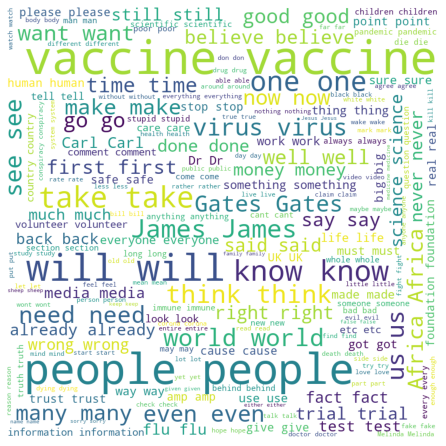

In [83]:
# cloud for replies
word_cloud_viewer(reply_counts)

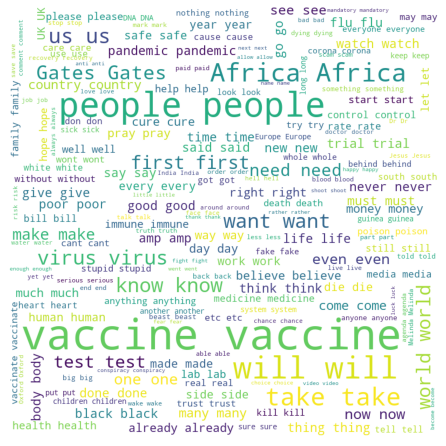

In [84]:
# cloud for comments
word_cloud_viewer(comment_counts)

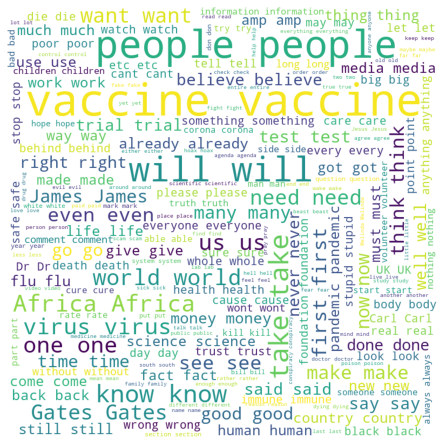

In [88]:
#Word count for the combined text
word_cloud_viewer(combined_counts)

In [ ]:
# Counting the stemed versions

In [89]:
 # sorting the word counts order
reply_word_counts_sorted = sorted(reply_counts.items(), key=lambda x: x[1], reverse=True)
comment_word_counts_sorted = sorted(comment_counts.items(), key=lambda x: x[1], reverse=True)
combined_word_counts_sorted = sorted(combined_counts.items(), key=lambda x: x[1], reverse=True)

<BarContainer object of 20 artists>

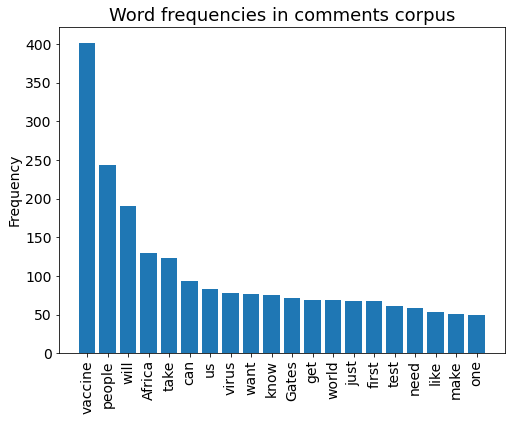

In [103]:
#df_stack=df.stack(level=0) 
#counter=df_stack.value_counts() # set top 10: df_stack.value_counts()[0:10]


plt.figure(figsize = (8,6))#, facecolor = None)
plt.title('Word frequencies in comments corpus',fontsize=18)
plt.ylabel('Frequency',fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation='vertical',fontsize=14)
plt.bar([comment_word_counts_sorted[i][0] for i in range(20)],[comment_word_counts_sorted[i][1] for i in range(20)])

<BarContainer object of 30 artists>

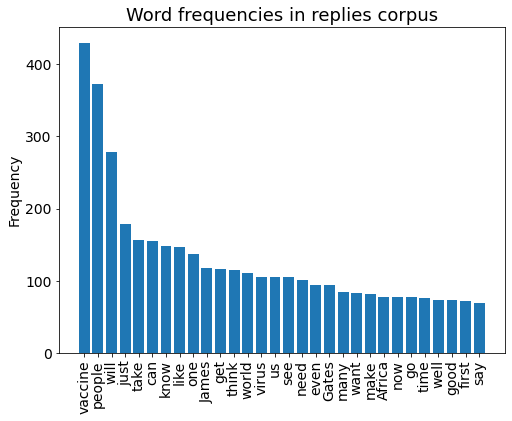

In [105]:
#df_stack=df.stack(level=0) 
#counter=df_stack.value_counts() # set top 10: df_stack.value_counts()[0:10]
plt.figure(figsize = (8,6))#, facecolor = None)
plt.title('Word frequencies in replies corpus',fontsize=18)
plt.ylabel('Frequency',fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation='vertical',fontsize=14)
plt.bar([reply_word_counts_sorted[i][0] for i in range(30)],[reply_word_counts_sorted[i][1] for i in range(30)])

<BarContainer object of 30 artists>

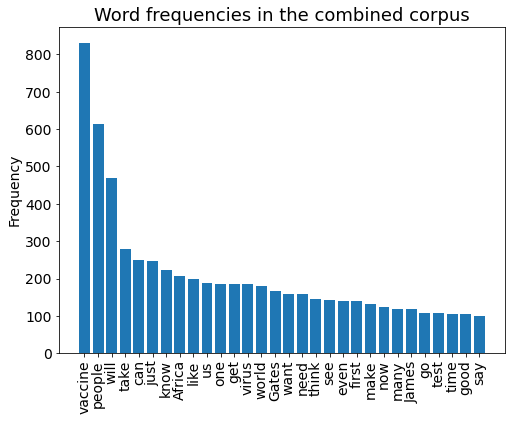

In [107]:
#combined dataset
plt.figure(figsize = (8,6))#, facecolor = None)
plt.title('Word frequencies in the combined corpus',fontsize=18)
plt.ylabel('Frequency',fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation='vertical',fontsize=14)
plt.bar([combined_word_counts_sorted[i][0] for i in range(30)],[combined_word_counts_sorted[i][1] for i in range(30)])